In [1]:
from behavior.behavior import behavior
from behavior.plotScale import plotScale
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [10]:
mouse = 'LR8'
#dates = ['180713', '180717', '180719', '180720', '180724', '180725', '180731', '180801']
dates = ['180720', '180801']
runs = [1, 2, 3]

LR8 = behavior(mouse, dates, runs)
#LR8.setDir('/Volumes/User Folders/Trent/MixedValenceBehavior')
LR8.setDir('/Users/Amelia/Documents/hakan')
#LR8.setDir('C:/Users/hkucukde/Documents/data')
LR8.loadData('all')


Base directory is set to /Users/Amelia/Documents/hakan

Loading data for LR8, run 1 of 180720...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 2 of 180720...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 3 of 180720...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
- - -

Loading data for LR8, run 1 of 180801...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 2 of 180801...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
Loading data for LR8, run 3 of 180801...
MonkeyLogic data loaded.
NI-DAQ data loaded.
Running data loaded.
- - -



In [11]:
LR8.loadTrials(save= False)
LR8.loadNidaq(clean=True, save= False)
LR8.loadRunning(save= False)


In [4]:
dates = ['180728', '180729', '180730', '180731']
dates = ['180801', '180802']
runs = [1, 2]
mouse = 'ALOA32'

LR8 = behavior(mouse, dates, runs)
LR8.setDir('/Volumes/2p_data/scan')

LR8.loadData('bhv', verbose= False)

LR8.loadTrials()

for date in dates:
    for run in runs:
        print mouse, date, run
        for i in [1,2,3,4]:
            performance = LR8.getPerformance(date, run).loc[i]
            print performance['conditions'], ':', performance['hit'], ' / ', performance['miss'], '\n'

IOError: Directory not found!

In [5]:
'mouse', 'date', 'run', 'trial', 'condition', 'hit', 'miss'

('mouse', 'date', 'run', 'trial', 'condition', 'hit', 'miss')

In [12]:
mus = LR8

Performance = pd.DataFrame([])

count = 0
for date in dates:
    for run in runs:
        for i in [1,2,3,4]:
            print run
            perf = LR8.getPerformance(date, run).loc[i]
            dict = {'mouse':mus.mouse, 'date':date, 'run':run, 'condition':perf['conditions'], 'hit':perf['hit'], 'miss':perf['miss']}
            performance = pd.DataFrame(dict, index=[count])
            Performance = pd.concat([Performance, performance])
            count = count + 1

1
1
1
1
2
2
2
2
3
3
3
3
1
1
1
1
2
2
2
2
3
3
3
3


In [49]:
codes=LR8.codes[dates[0]][1]

Performance[Performance['condition'] == codes[1]]

pd.melt(Performance[Performance['condition'] == 'CSmix_cond_2s_end'], ['hit', 'miss'])


,hit,miss,variable,value
0,1.000000,1.000000,condition,CSmix_cond_2s_end
1,1.000000,1.000000,condition,CSmix_cond_2s_end
2,1.000000,1.000000,condition,CSmix_cond_2s_end
3,0.410256,0.589744,condition,CSmix_cond_2s_end
4,0.366667,0.633333,condition,CSmix_cond_2s_end
5,0.190476,0.809524,condition,CSmix_cond_2s_end
6,1.000000,1.000000,date,180720
7,1.000000,1.000000,date,180720
8,1.000000,1.000000,date,180720
9,0.410256,0.589744,date,180801


ValueError: Could not interpret input 'value'

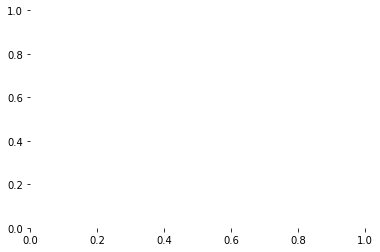

In [43]:
# Initialize the figure
f, ax = plt.subplots()
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="run", hue="None",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)


In [31]:
df = Performance.pivot_table(index= ['mouse', 'condition', 'date'], columns=['run'])

import seaborn as sns
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [32]:
iris = pd.melt(iris, "species", var_name="measurement")
iris

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
5,setosa,sepal_length,5.4
6,setosa,sepal_length,4.6
7,setosa,sepal_length,5.0
8,setosa,sepal_length,4.4
9,setosa,sepal_length,4.9


In [9]:
df.loc['LR8', 'Pavlovian_CSp_2s', '180801']

NameError: name 'df' is not defined